# Importing libraries & cleaned dataset from previous notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/train.csv")
df.head(15)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
5,5,42,1,100,4.4,6.4,5.3,25.5,0.84,111,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
6,6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,...,Female,White,Graduate,Lower-Middle,Current,Employed,0,0,0,1.0
7,7,51,3,102,4.0,7.3,5.5,27.1,0.83,125,...,Male,Asian,Highschool,Low,Never,Employed,1,0,0,1.0
8,8,34,2,44,2.7,7.0,7.9,22.6,0.81,120,...,Male,White,Highschool,Lower-Middle,Never,Employed,0,0,0,0.0
9,9,44,1,36,5.8,5.7,6.6,29.3,0.88,110,...,Male,Hispanic,Highschool,Middle,Never,Employed,1,0,0,1.0


#### Seperating numerical & categorical columns for EDA

In [4]:
numerical_cols = df.select_dtypes(exclude=['object'])
numerical_cols

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,69,163,58,90,126,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,65,188,45,107,119,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,63,168,59,77,166,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,69,198,55,108,133,0,0,0,1.0


In [5]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols

,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed
1,Female,White,Highschool,Upper-Middle,Never,Employed
2,Male,Hispanic,Highschool,Lower-Middle,Never,Retired
3,Female,White,Highschool,Lower-Middle,Current,Employed
4,Male,White,Highschool,Upper-Middle,Never,Retired
...,...,...,...,...,...,...
699995,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed
699996,Female,Hispanic,Graduate,Upper-Middle,Former,Employed
699997,Female,White,Graduate,Middle,Never,Employed
699998,Female,White,Highschool,Lower-Middle,Never,Retired


# 1. Working on Categorical Columns first

### **Univariate Analysis**

### *Let's write a short script to iterate & print graph of all Categorical columns for their data distribution*

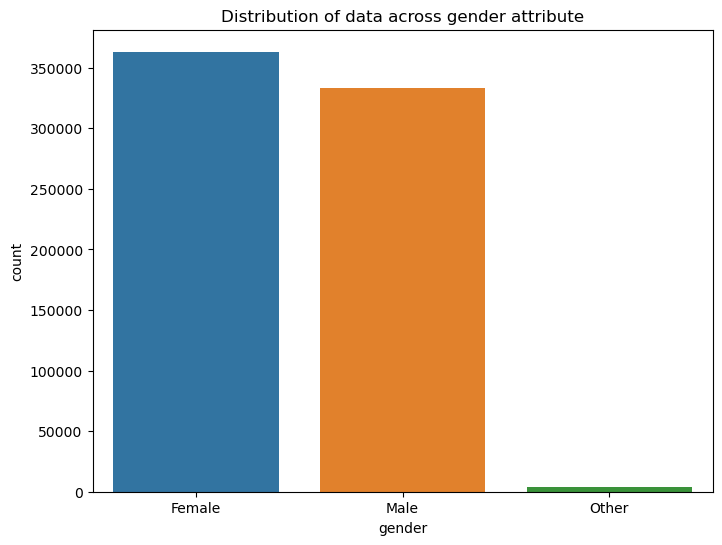

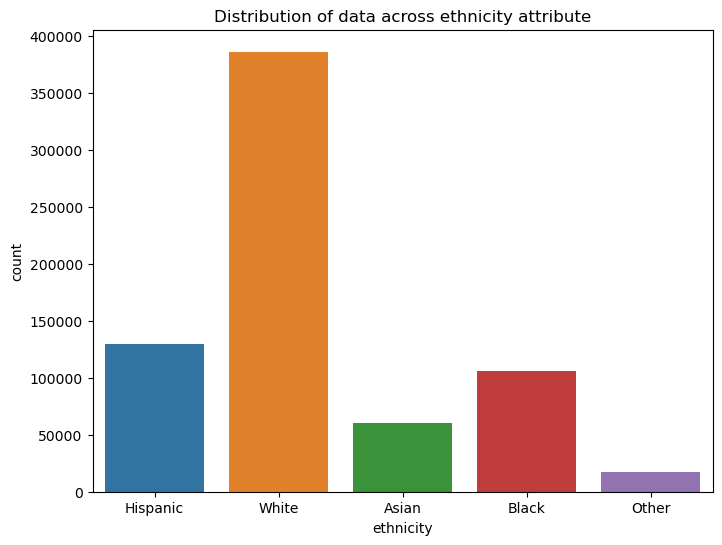

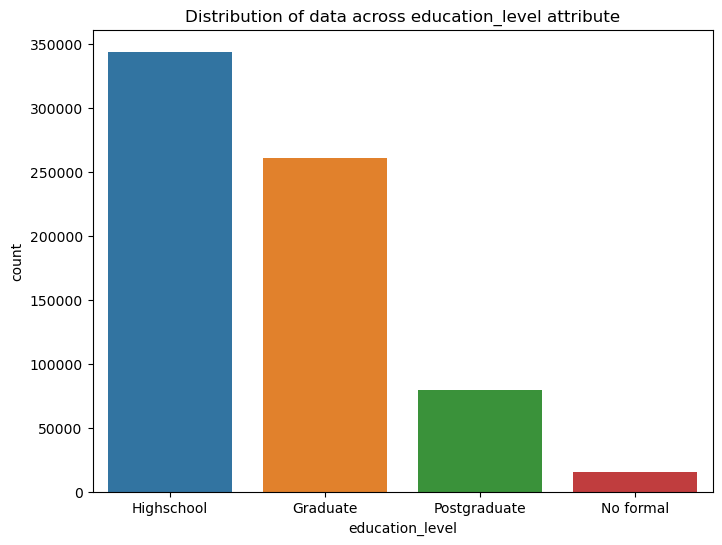

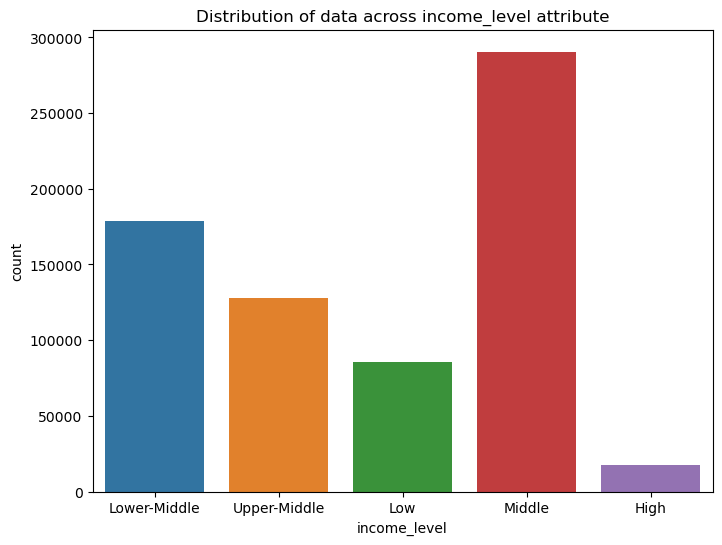

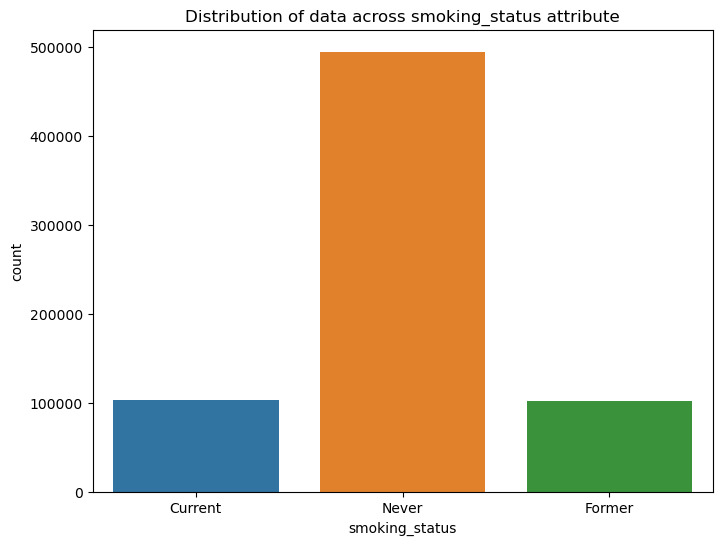

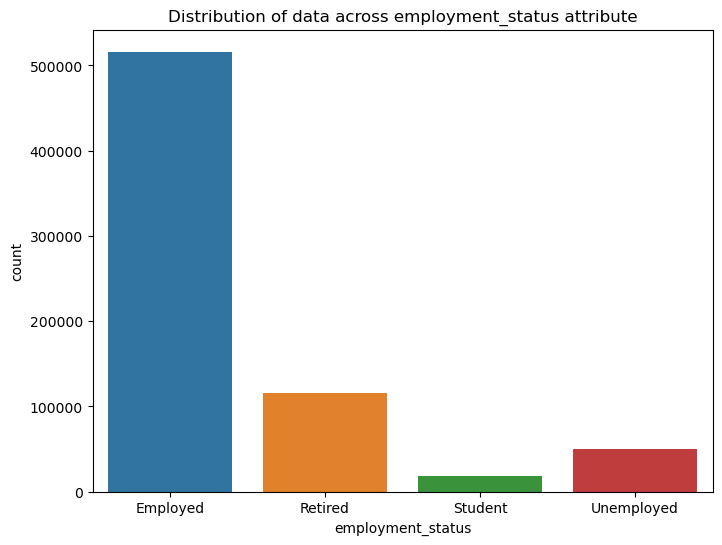

In [6]:
cat_cols= categorical_cols.columns.to_list()
for i in cat_cols:
    plt.figure(figsize=(8,6))
    sb.countplot(x=categorical_cols[i])
    plt.title(f"Distribution of data across {i} attribute")
    plt.show()

# 2. Working on Numerical Columns

### **Univariate Analysis**

In [7]:
numerical_cols = df.select_dtypes(exclude=['object'])
numerical_cols

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,69,163,58,90,126,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,65,188,45,107,119,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,63,168,59,77,166,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,69,198,55,108,133,0,0,0,1.0


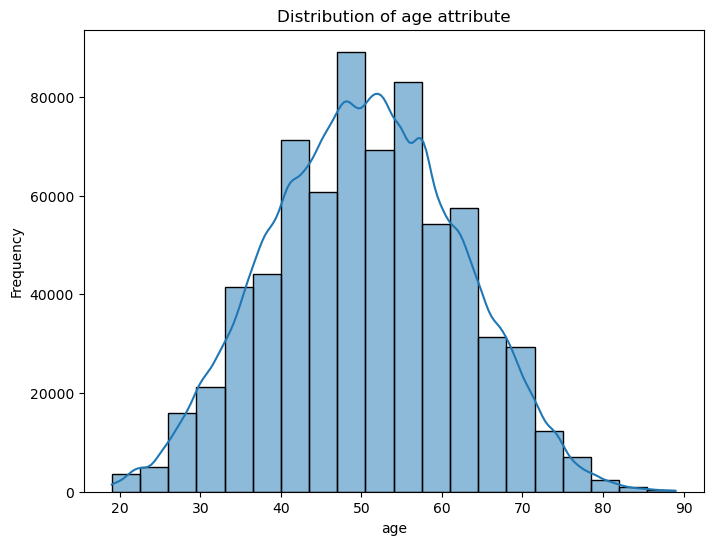

In [8]:
plt.figure(figsize =(8,6))
sb.histplot(data = numerical_cols, x= 'age',kde=True,bins=20)
plt.title("Distribution of age attribute")
plt.ylabel("Frequency")
plt.show()

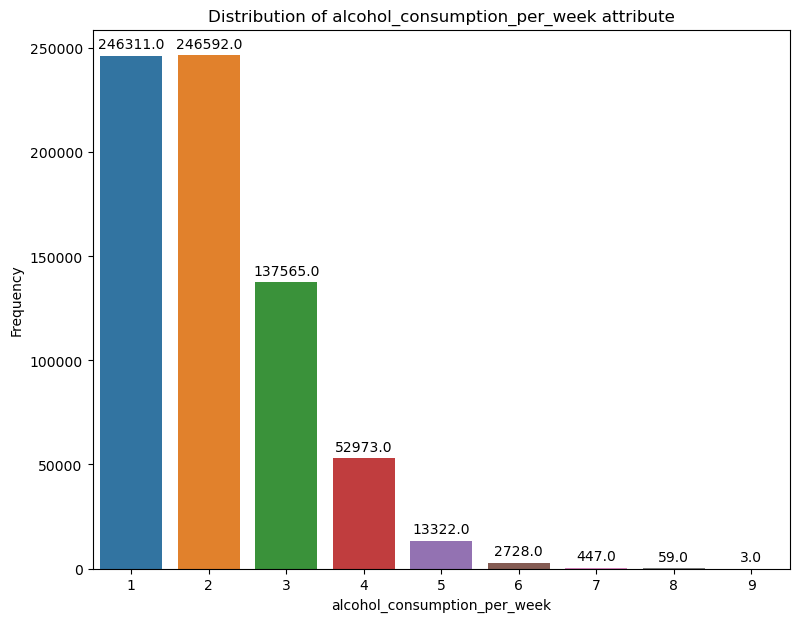

In [9]:
plt.figure(figsize =(9,7))
ax= sb.countplot(data = numerical_cols, x= 'alcohol_consumption_per_week')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of alcohol_consumption_per_week attribute")
plt.ylabel("Frequency")
plt.show()

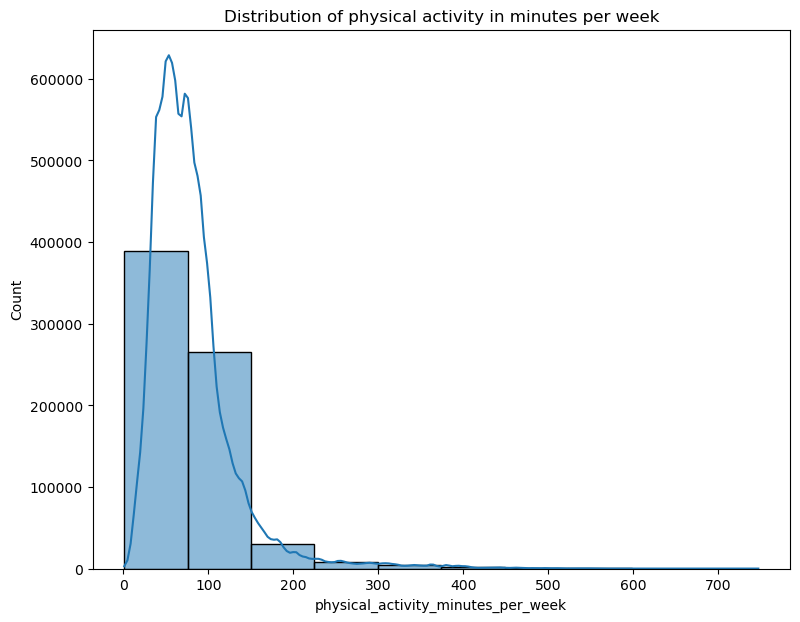

In [10]:
plt.figure(figsize=(9,7))
sb.histplot(data=numerical_cols,x=('physical_activity_minutes_per_week'),kde=True,bins=10)
plt.title("Distribution of physical activity in minutes per week")
plt.show()

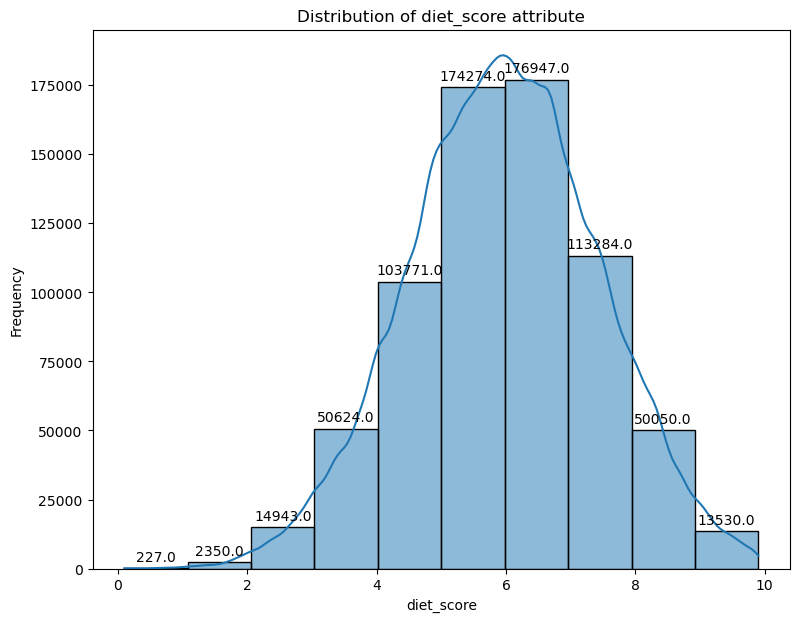

In [11]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'diet_score',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of diet_score attribute")
plt.ylabel("Frequency")
plt.show()

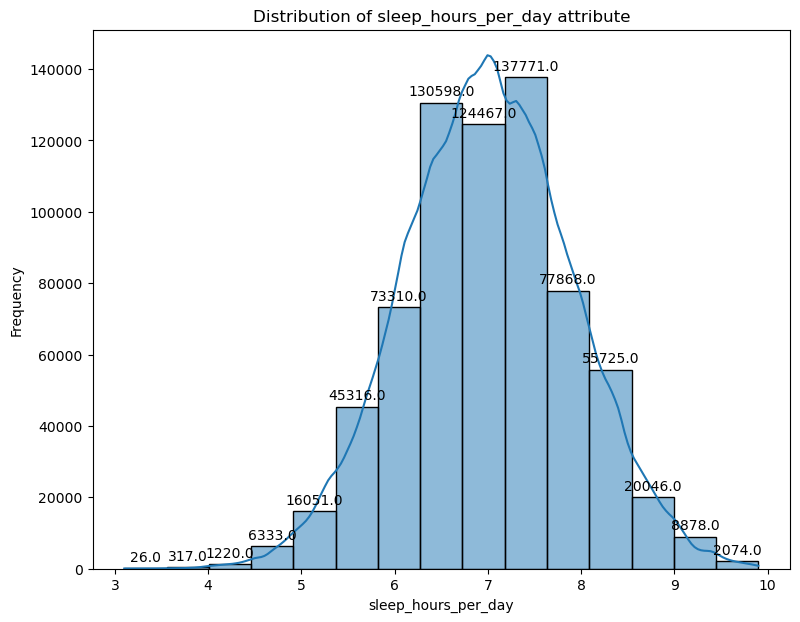

In [12]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'sleep_hours_per_day',kde=True,bins=15)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of sleep_hours_per_day attribute")
plt.ylabel("Frequency")
plt.show()

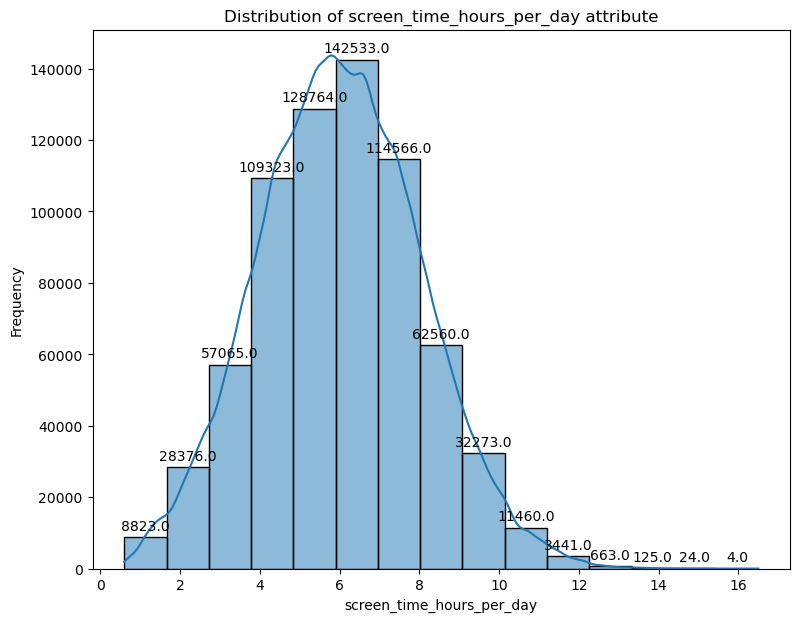

In [13]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'screen_time_hours_per_day',kde=True,bins=15)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of screen_time_hours_per_day attribute")
plt.ylabel("Frequency")
plt.show()

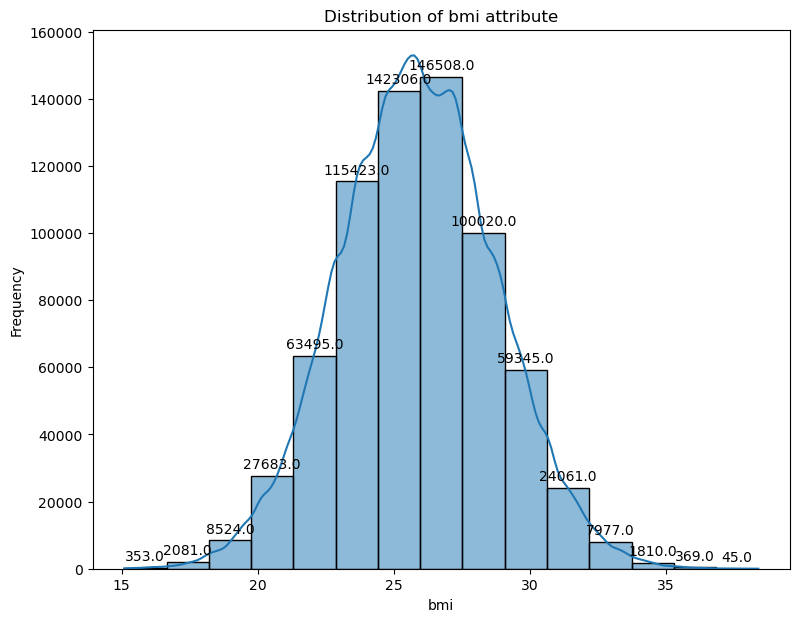

In [14]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'bmi',kde=True,bins=15)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of bmi attribute")
plt.ylabel("Frequency")
plt.show()

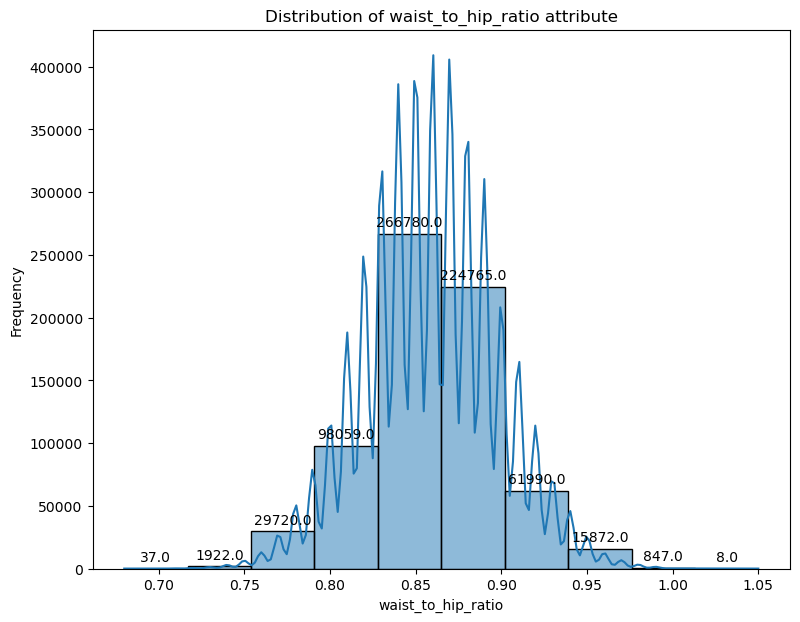

In [15]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'waist_to_hip_ratio',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of waist_to_hip_ratio attribute")
plt.ylabel("Frequency")
plt.show()

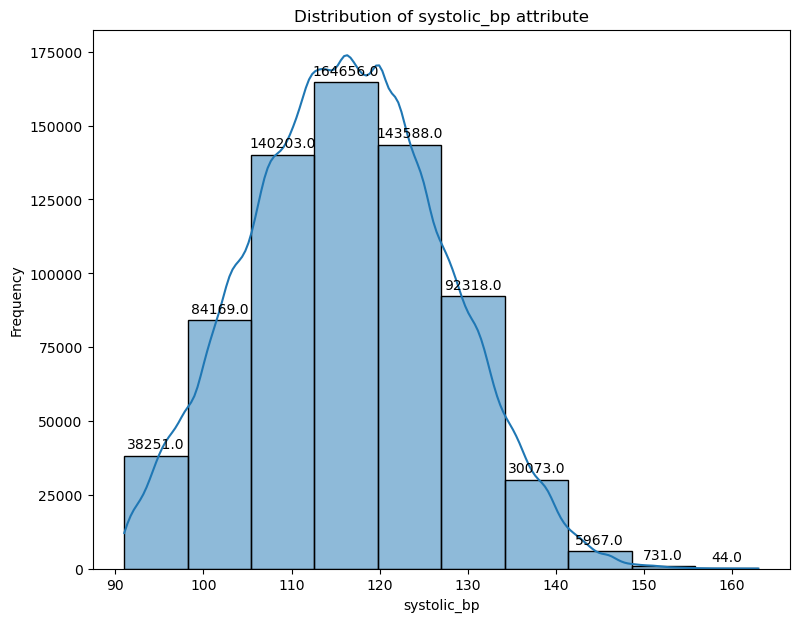

In [16]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'systolic_bp',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of systolic_bp attribute")
plt.ylabel("Frequency")
plt.show()

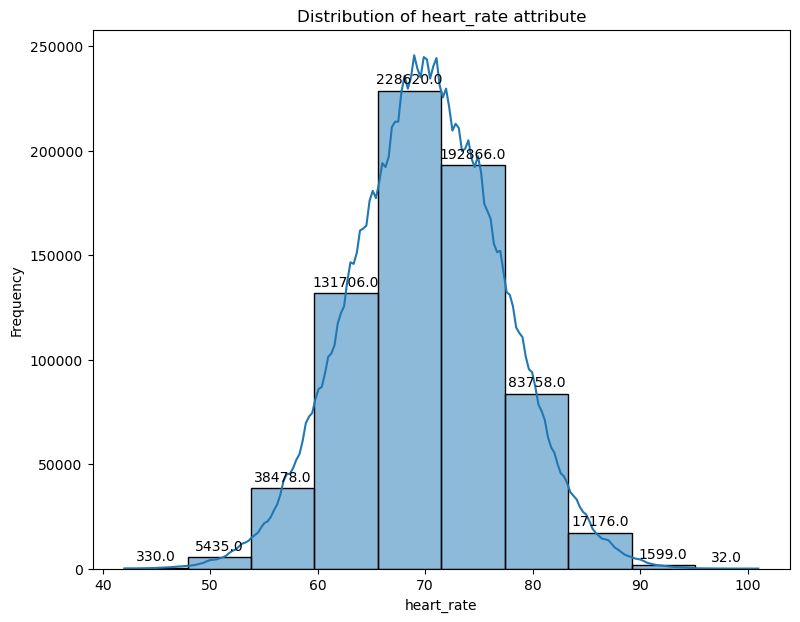

In [17]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'heart_rate',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of heart_rate attribute")
plt.ylabel("Frequency")
plt.show()

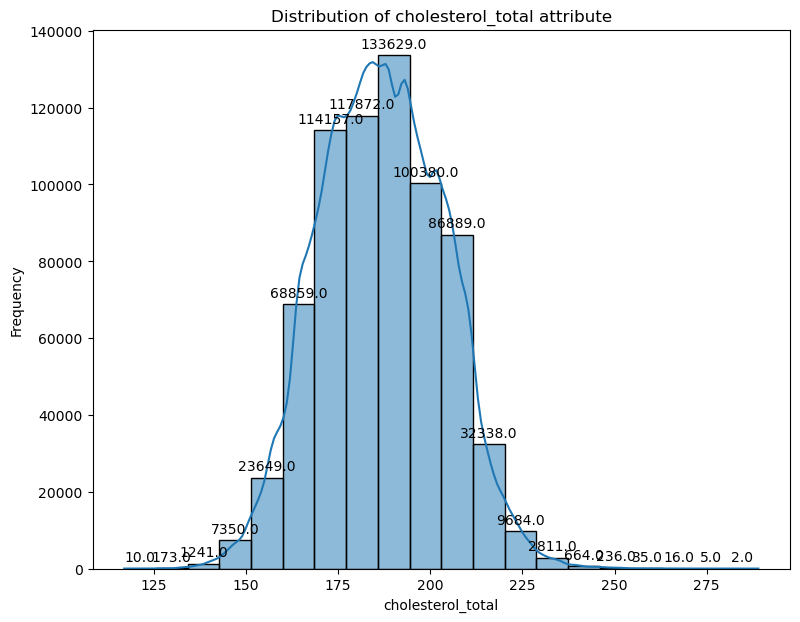

In [18]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'cholesterol_total',kde=True,bins=20)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of cholesterol_total attribute")
plt.ylabel("Frequency")
plt.show()

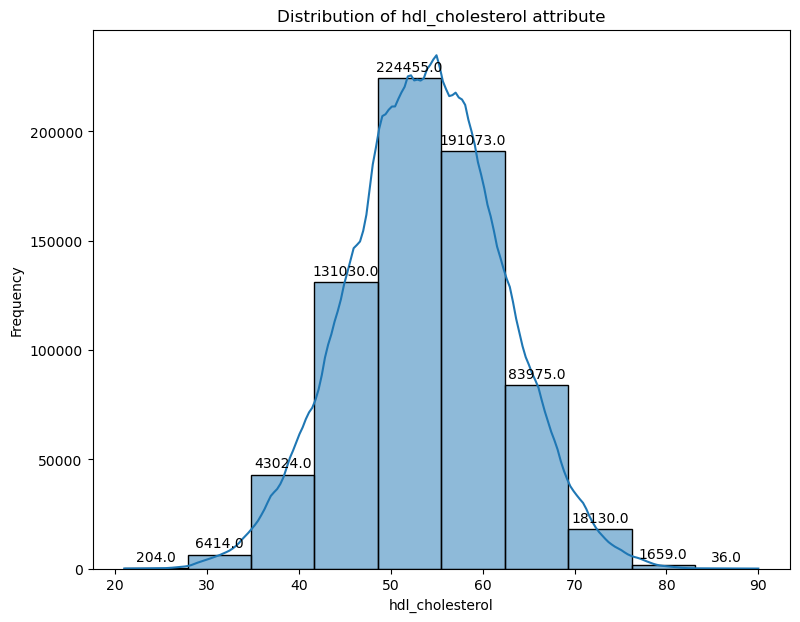

In [19]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'hdl_cholesterol',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of hdl_cholesterol attribute")
plt.ylabel("Frequency")
plt.show()

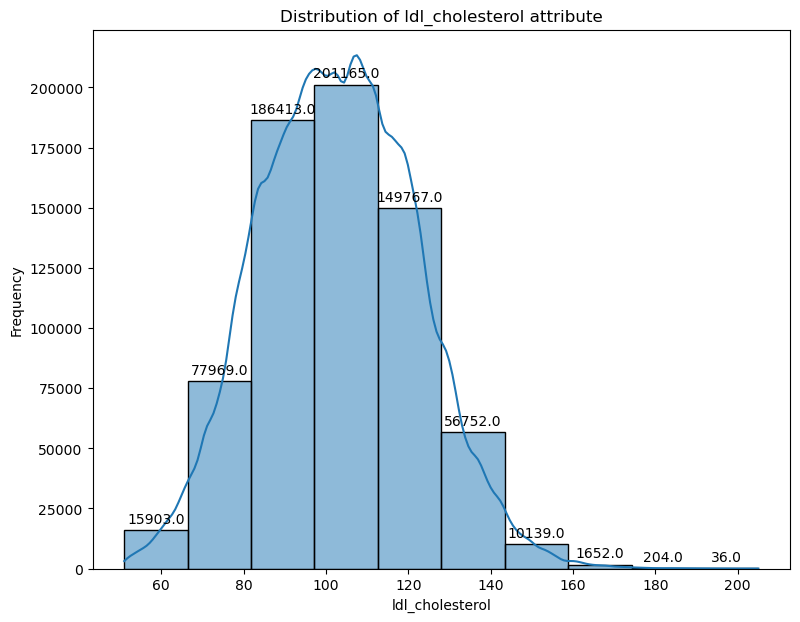

In [20]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'ldl_cholesterol',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of ldl_cholesterol attribute")
plt.ylabel("Frequency")
plt.show()

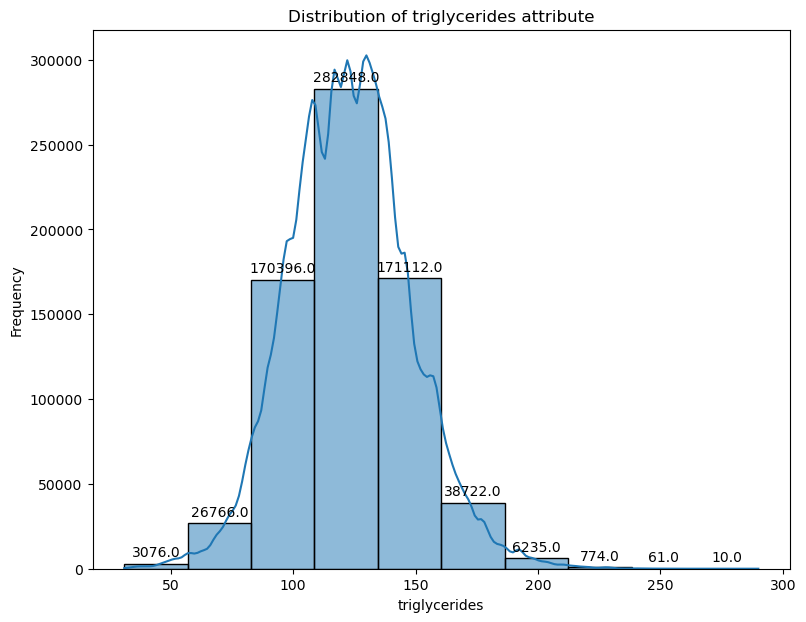

In [21]:
plt.figure(figsize =(9,7))
ax= sb.histplot(data = numerical_cols, x= 'triglycerides',kde=True,bins=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Distribution of triglycerides attribute")
plt.ylabel("Frequency")
plt.show()

<Axes: >

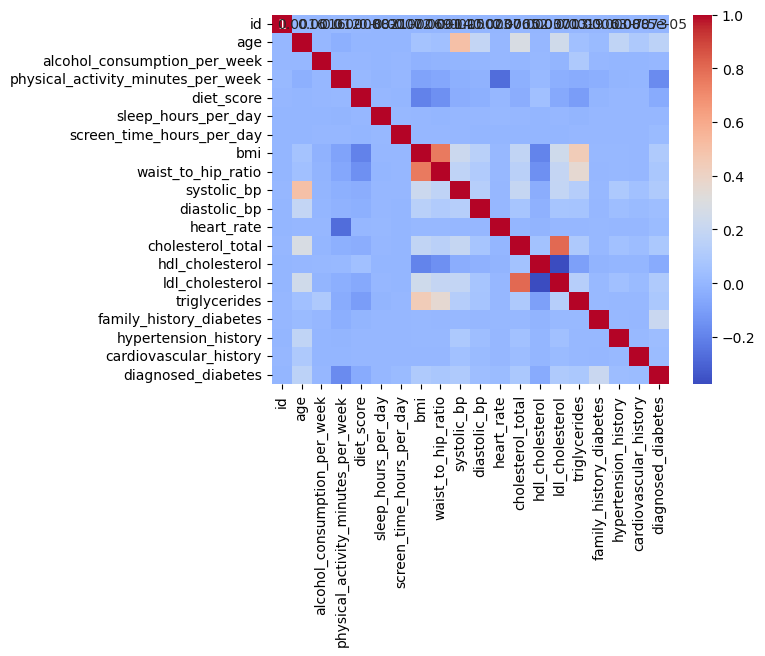

In [22]:
sb.heatmap(numerical_cols.corr(),annot=True,cmap='coolwarm')

## 2.1 Since there are some columns which have **int64** datatype but they are **binary** in nature.
### *So,let's identify those columns first to visualise their distribution across the dataset*

In [23]:
binary_cols=[]
for i in numerical_cols:

    # Check if it has exactly two unique values
    if len(numerical_cols[i].unique()) == 2:

        # Check if those values are exactly {0, 1}
        if set(numerical_cols[i].unique()) == {0, 1}:
            binary_cols.append(i)
            print(i, "is binary column having values (0/1)")
    else:
        continue
print(binary_cols)

family_history_diabetes is binary column having values (0/1)
hypertension_history is binary column having values (0/1)
cardiovascular_history is binary column having values (0/1)
diagnosed_diabetes is binary column having values (0/1)
['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']


### **Creating a seperate dataframe for binary columns & plotting them**

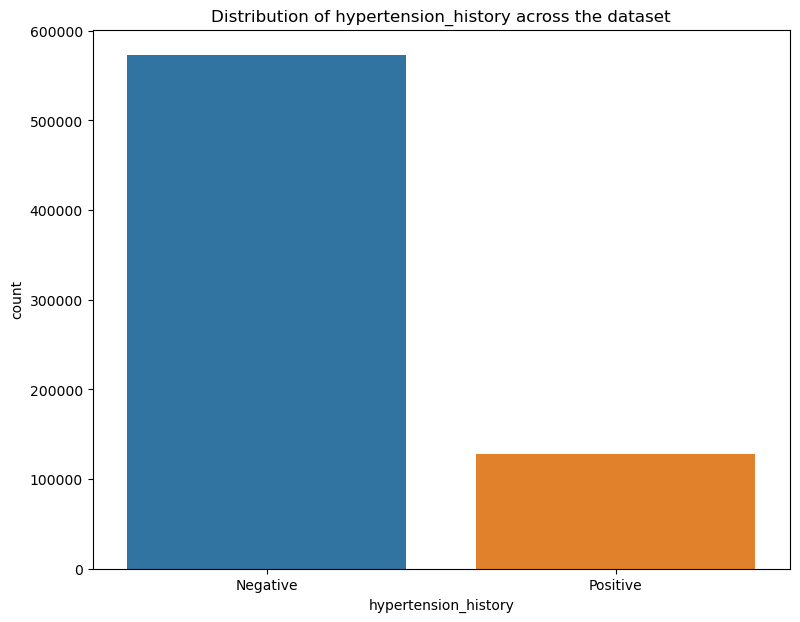

In [ ]:
binary_df = df[binary_cols]
mapping = {"0":"Negative","1":"Positive"}

plt.figure(figsize=(9,7))
ax=sb.countplot(data=binary_df,x=binary_df['hypertension_history'])\

ax.set_xticklabels(mapping[x.get_text()] for x in ax.get_xticklabels())
plt.title("Distribution of hypertension_history across the dataset")
plt.show()

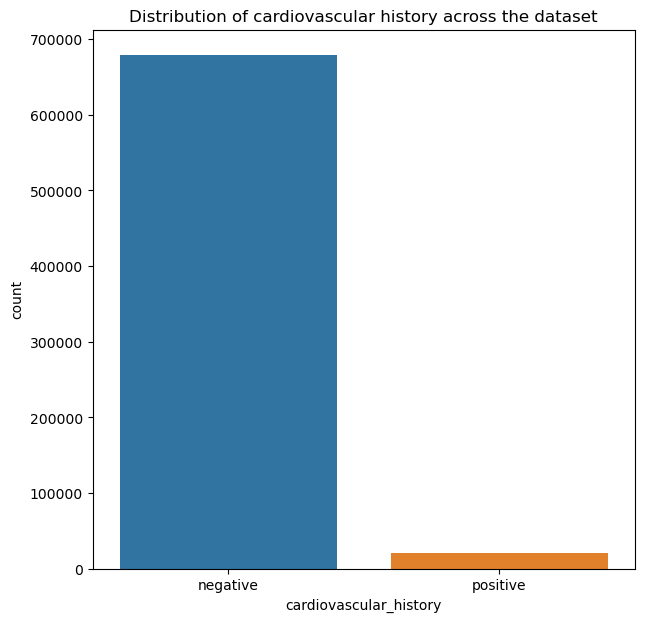

In [26]:
mapping = {"0":"negative","1":"positive"}

plt.figure(figsize=(7,7))
ax= sb.countplot(data=binary_df,x=binary_df['cardiovascular_history'])
ax.set_xticklabels([mapping[x.get_text()] for x in ax.get_xticklabels()])
plt.title("Distribution of cardiovascular history across the dataset")
plt.show()

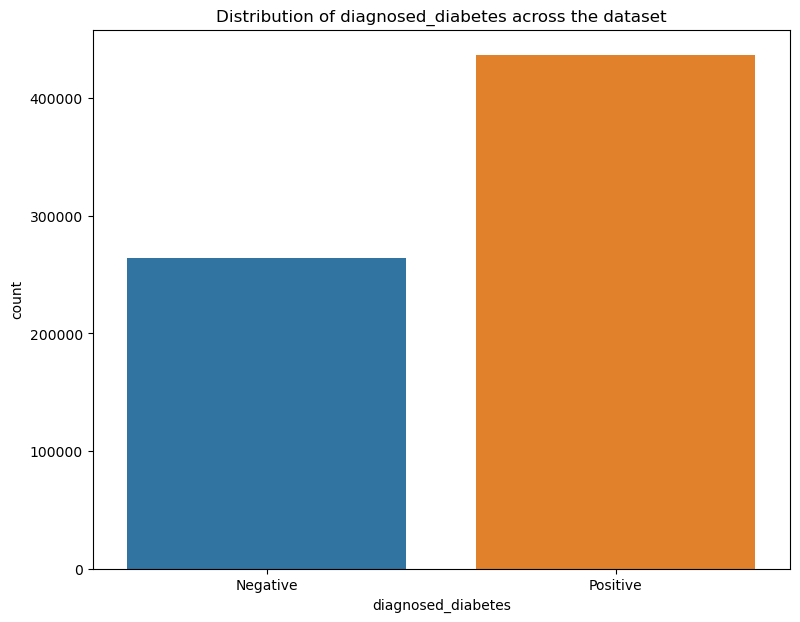

In [29]:
mapping = {"0.0":"Negative","1.0":"Positive"}

plt.figure(figsize=(9,7))
ax=sb.countplot(data=binary_df,x=binary_df['diagnosed_diabetes'])\

ax.set_xticklabels(mapping[x.get_text()] for x in ax.get_xticklabels())
plt.title("Distribution of diagnosed_diabetes across the dataset")
plt.show()

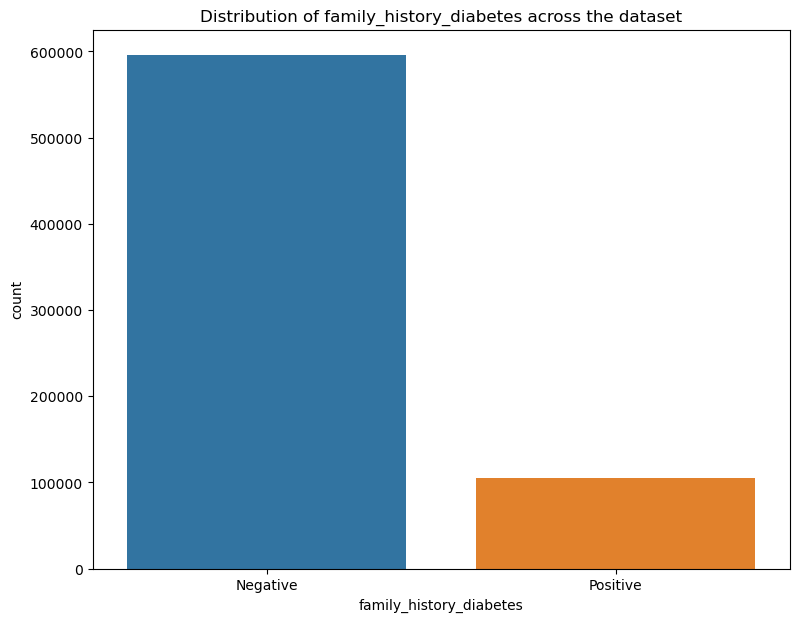

In [30]:
mapping = {"0":"Negative","1":"Positive"}

plt.figure(figsize=(9,7))
ax=sb.countplot(data=binary_df,x=binary_df['family_history_diabetes'])\

ax.set_xticklabels(mapping[x.get_text()] for x in ax.get_xticklabels())
plt.title("Distribution of family_history_diabetes across the dataset")
plt.show()

# **Univariate Analysis complete**
# Next Steps: Moving to Bi-variate analysis in seperate notebook